In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import glob
import xarray as xr
import os

In [3]:
all_files = []
local_storage_directory = '/Volumes/Seagate Backup Plus Drive/'

all_folders = glob.glob(local_storage_directory +'12843_A202011/' + '*2020')
for folders in all_folders:
    files = glob.glob(folders + '/*nc')
    all_files.append(files)
    
len(all_files[1])

288

In [4]:
flat_list = [item for sublist in all_files for item in sublist]
len(flat_list)

7987

In [8]:
#path = netcdf_dir # use your path
#all_files = glob.glob(path + "*.nc")
li = []

def my_func(a,b):
    for filename in flat_list[a:b]:
        print(flat_list.index(filename))
        print('starting with filename', filename)
        ds = xr.open_dataset(filename)
        df = ds.to_dataframe()
        a = df.index[0][1]
        b = df.index[0][2]
        c = df.index[0][3]
        d = df.index[1][3]
        e = df.index[2][3]
        
        condition1 =df.index.get_level_values('range').isin([a])
        condition2 =df.index.get_level_values('range_hr').isin([b])
        condition3 =df.index.get_level_values('layer').isin([c])
        condition4 =df.index.get_level_values('layer').isin([d])
        condition5 =df.index.get_level_values('layer').isin([e])
        
        x = df.iloc[:,:][condition1 & condition2 & condition3]
        y = df.iloc[:,:][condition1 & condition2 & condition4]
        z = df.iloc[:,:][condition1 & condition2 & condition5]
        
        x = x.reset_index(level = ['range','range_hr','layer'])
        y = y.reset_index(level = ['range','range_hr','layer'])
        z = z.reset_index(level = ['range','range_hr','layer'])
        
        final = pd.concat([x,y,z], axis = 1, ignore_index= False)
        #final["date"] = pd.to_datetime(df.index)
        print('finished processing', filename)
        
        print('appending', filename)
        li.append(final)
        
        print('appended', filename)
    
    print('concatenating')    
    frame = pd.concat(li, axis=0, ignore_index= False)
    frame.reset_index(inplace= True)
    frame['time'] = pd.to_datetime(frame['time'])
    frame = frame.sort_values(by= 'time')
    frame = frame.set_index(['time'])
        
    print('finished')   
        
        
    return frame

In [14]:
final0 = my_func(a=0, b = 1)

0
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132210_CHM15k.nc
concatenating
finished


In [11]:
final = my_func(a=1, b = 775)

1
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132215_CHM15k.nc
2
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132220_CHM15k.nc
3
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132225_CHM15k.nc
finished processing /Volumes/Seagate 

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132355_CHM15k.nc
22
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130000_CHM15k.nc
23
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130005_CHM15k.nc
appending /Volumes/Seagate Backup Plus D

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130140_CHM15k.nc
42
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130145_CHM15k.nc
43
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130150_CHM15k.nc
appending /Volumes/Seagate Backup Plus D

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130330_CHM15k.nc
62
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130335_CHM15k.nc
63
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130340_CHM15k.nc
appending /Volumes/Seagate Backup Plus D

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130915_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130915_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130915_CHM15k.nc
82
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131025_CHM15k.nc
83
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131135_CHM15k.nc
appending /Volumes/Seagate Backup Plus D

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130520_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130520_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130520_CHM15k.nc
102
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130525_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130525_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130525_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130525_CHM15k.nc
103
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130530_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130530_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130710_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130710_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130710_CHM15k.nc
122
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130715_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130715_CHM15k.nc
123
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130720_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130855_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130855_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130855_CHM15k.nc
142
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130900_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130900_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130900_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130900_CHM15k.nc
143
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130905_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011130905_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131045_CHM15k.nc
162
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131050_CHM15k.nc
163
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131055_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131230_CHM15k.nc
182
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131235_CHM15k.nc
183
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131240_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131420_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131420_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131420_CHM15k.nc
202
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131425_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131425_CHM15k.nc
203
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131430_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131605_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131605_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131605_CHM15k.nc
222
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131610_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131610_CHM15k.nc
223
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131620_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131755_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131755_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131755_CHM15k.nc
242
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131800_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131800_CHM15k.nc
243
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131805_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131805_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131940_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131940_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131940_CHM15k.nc
262
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131950_CHM15k.nc
263
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011131955_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132130_CHM15k.nc
282
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132135_CHM15k.nc
283
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/13_11_2020/12843_A202011132140_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142316_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142316_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142316_CHM15k.nc
302
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142321_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142321_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142321_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142321_CHM15k.nc
303
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142326_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142326_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140055_CHM15k.nc
322
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140100_CHM15k.nc
323
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140110_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140245_CHM15k.nc
342
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140250_CHM15k.nc
343
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140255_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140430_CHM15k.nc
362
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140105_CHM15k.nc
363
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140215_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140440_CHM15k.nc
382
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140445_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140445_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140445_CHM15k.nc
383
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140450_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140450_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140625_CHM15k.nc
402
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140630_CHM15k.nc
403
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140635_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140815_CHM15k.nc
422
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140820_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140820_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140820_CHM15k.nc
423
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140825_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011140825_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141000_CHM15k.nc
442
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141005_CHM15k.nc
443
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141010_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141150_CHM15k.nc
462
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141155_CHM15k.nc
463
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141200_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141335_CHM15k.nc
482
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141340_CHM15k.nc
483
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141345_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141526_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141526_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141526_CHM15k.nc
502
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141531_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141531_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141531_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141531_CHM15k.nc
503
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141536_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141536_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141711_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141711_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141711_CHM15k.nc
522
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141716_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141716_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141716_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141716_CHM15k.nc
523
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141721_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141721_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141901_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141901_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141901_CHM15k.nc
542
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141906_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141906_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141906_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141906_CHM15k.nc
543
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141911_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011141911_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142046_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142046_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142046_CHM15k.nc
562
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142051_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142051_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142051_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142051_CHM15k.nc
563
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142101_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/14_11_2020/12843_A202011142101_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152236_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152236_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152236_CHM15k.nc
582
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152241_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152241_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152241_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152241_CHM15k.nc
583
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152246_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152246_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150015_CHM15k.nc
602
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150020_CHM15k.nc
603
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150025_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150200_CHM15k.nc
622
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150205_CHM15k.nc
623
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150210_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150350_CHM15k.nc
642
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150355_CHM15k.nc
643
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150400_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150400_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151355_CHM15k.nc
662
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151505_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151505_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151505_CHM15k.nc
663
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151615_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151615_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150540_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150540_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150540_CHM15k.nc
682
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150550_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150550_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150550_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150550_CHM15k.nc
683
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150555_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150555_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150730_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150730_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150730_CHM15k.nc
702
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150735_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150735_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150735_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150735_CHM15k.nc
703
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150740_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150740_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150920_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150920_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150920_CHM15k.nc
722
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150925_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150925_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150925_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150925_CHM15k.nc
723
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150930_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011150930_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151105_CHM15k.nc
742
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151110_CHM15k.nc
743
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151115_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151255_CHM15k.nc
762
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151300_CHM15k.nc
763
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151305_CHM15k.nc
appending /Volumes/Seagate Backup Plus

In [13]:
final2 = my_func(a=775, b = 5000)

775
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151410_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151410_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151410_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151410_CHM15k.nc
776
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151415_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151415_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151415_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151415_CHM15k.nc
777
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151420_CHM15k.nc
finished processing /Volumes/Se

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151550_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151550_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151550_CHM15k.nc
795
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151555_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151555_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151555_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151555_CHM15k.nc
796
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151600_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151600_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151740_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151740_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151740_CHM15k.nc
815
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151745_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151745_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151745_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151745_CHM15k.nc
816
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151750_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151750_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151925_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151925_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151925_CHM15k.nc
835
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151930_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151930_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151930_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151930_CHM15k.nc
836
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151935_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011151935_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152115_CHM15k.nc
855
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152120_CHM15k.nc
856
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/15_11_2020/12843_A202011152125_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162301_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162301_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162301_CHM15k.nc
875
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162306_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162306_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162306_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162306_CHM15k.nc
876
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162311_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162311_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160040_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160040_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160040_CHM15k.nc
895
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160045_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160045_CHM15k.nc
896
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160050_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160230_CHM15k.nc
915
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160235_CHM15k.nc
916
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160240_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160415_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160415_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160415_CHM15k.nc
935
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160420_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160420_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160420_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160420_CHM15k.nc
936
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160425_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160425_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161946_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161946_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161946_CHM15k.nc
955
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162056_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162056_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162056_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162056_CHM15k.nc
956
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162206_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162206_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160610_CHM15k.nc
975
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160615_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160615_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160615_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160615_CHM15k.nc
976
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160620_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160755_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160755_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160755_CHM15k.nc
995
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160800_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160800_CHM15k.nc
996
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160810_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160810_CHM15k.nc
appending /Volumes/Seagate Backup Plus

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160945_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160945_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160945_CHM15k.nc
1015
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160950_CHM15k.nc
1016
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011160955_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161130_CHM15k.nc
1035
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161140_CHM15k.nc
1036
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161321_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161321_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161321_CHM15k.nc
1055
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161326_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161326_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161326_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161326_CHM15k.nc
1056
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161331_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161331_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161511_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161511_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161511_CHM15k.nc
1075
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161516_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161516_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161516_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161516_CHM15k.nc
1076
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161521_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161521_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161656_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161656_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161656_CHM15k.nc
1095
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161701_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161701_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161701_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161701_CHM15k.nc
1096
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161706_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161706_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161846_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161846_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161846_CHM15k.nc
1115
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161851_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161851_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161851_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161851_CHM15k.nc
1116
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161856_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011161856_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162031_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162031_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162031_CHM15k.nc
1135
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162036_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162036_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162036_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162036_CHM15k.nc
1136
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162041_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/16_11_2020/12843_A202011162041_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172221_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172221_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172221_CHM15k.nc
1155
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172226_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172226_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172226_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172226_CHM15k.nc
1156
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172231_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172231_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170000_CHM15k.nc
1175
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170005_CHM15k.nc
1176
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170010_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170145_CHM15k.nc
1195
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170150_CHM15k.nc
1196
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170335_CHM15k.nc
1215
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170340_CHM15k.nc
1216
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170345_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171025_CHM15k.nc
1235
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171135_CHM15k.nc
1236
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171245_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170525_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170525_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170525_CHM15k.nc
1255
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170530_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170530_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170530_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170530_CHM15k.nc
1256
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170535_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170535_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170715_CHM15k.nc
1275
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170720_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170720_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170720_CHM15k.nc
1276
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170725_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170725_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170900_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170900_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170900_CHM15k.nc
1295
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170905_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170905_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170905_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170905_CHM15k.nc
1296
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170910_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011170910_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171050_CHM15k.nc
1315
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171055_CHM15k.nc
1316
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171100_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171235_CHM15k.nc
1335
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171240_CHM15k.nc
1336
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171250_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171425_CHM15k.nc
1355
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171430_CHM15k.nc
1356
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171435_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171610_CHM15k.nc
1375
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171620_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171620_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171620_CHM15k.nc
1376
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171625_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171625_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171800_CHM15k.nc
1395
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171805_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171805_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171805_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171805_CHM15k.nc
1396
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171810_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171810_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171950_CHM15k.nc
1415
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171955_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171955_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011171955_CHM15k.nc
1416
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172000_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172136_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172136_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172136_CHM15k.nc
1435
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172141_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172141_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172141_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172141_CHM15k.nc
1436
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172146_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/17_11_2020/12843_A202011172146_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182320_CHM15k.nc
1455
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182325_CHM15k.nc
1456
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182330_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180100_CHM15k.nc
1475
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180110_CHM15k.nc
1476
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180115_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180250_CHM15k.nc
1495
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180255_CHM15k.nc
1496
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180300_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180105_CHM15k.nc
1515
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180215_CHM15k.nc
1516
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180325_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180445_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180445_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180445_CHM15k.nc
1535
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180450_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180450_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180450_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180450_CHM15k.nc
1536
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180455_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180455_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180630_CHM15k.nc
1555
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180635_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180635_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180635_CHM15k.nc
1556
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180640_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180640_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180820_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180820_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180820_CHM15k.nc
1575
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180825_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180825_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180825_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180825_CHM15k.nc
1576
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180830_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011180830_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181005_CHM15k.nc
1595
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181010_CHM15k.nc
1596
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181015_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181155_CHM15k.nc
1615
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181200_CHM15k.nc
1616
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181205_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181340_CHM15k.nc
1635
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181345_CHM15k.nc
1636
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181350_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181530_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181530_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181530_CHM15k.nc
1655
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181535_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181535_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181535_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181535_CHM15k.nc
1656
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181540_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181540_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181715_CHM15k.nc
1675
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181720_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181720_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181720_CHM15k.nc
1676
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181730_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181730_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181905_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181905_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181905_CHM15k.nc
1695
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181910_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181910_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181910_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181910_CHM15k.nc
1696
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181915_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011181915_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182050_CHM15k.nc
1715
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182100_CHM15k.nc
1716
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/18_11_2020/12843_A202011182105_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192241_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192241_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192241_CHM15k.nc
1735
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192246_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192246_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192246_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192246_CHM15k.nc
1736
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192251_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192251_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190020_CHM15k.nc
1755
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190025_CHM15k.nc
1756
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190030_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190030_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190205_CHM15k.nc
1775
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190210_CHM15k.nc
1776
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190220_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190355_CHM15k.nc
1795
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190400_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190400_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190400_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190400_CHM15k.nc
1796
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190405_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190405_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191505_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191505_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191505_CHM15k.nc
1815
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191615_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191615_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191615_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191615_CHM15k.nc
1816
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191725_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191725_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190550_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190550_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190550_CHM15k.nc
1835
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190555_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190555_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190555_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190555_CHM15k.nc
1836
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190600_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190600_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190735_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190735_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190735_CHM15k.nc
1855
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190740_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190740_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190740_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190740_CHM15k.nc
1856
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190745_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190745_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190925_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190925_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190925_CHM15k.nc
1875
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190930_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190930_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190930_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190930_CHM15k.nc
1876
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190935_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011190935_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191110_CHM15k.nc
1895
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191115_CHM15k.nc
1896
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191120_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191300_CHM15k.nc
1915
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191305_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191305_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191305_CHM15k.nc
1916
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191310_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191310_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191445_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191445_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191445_CHM15k.nc
1935
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191450_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191450_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191450_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191450_CHM15k.nc
1936
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191455_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191455_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191635_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191635_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191635_CHM15k.nc
1955
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191640_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191640_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191640_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191640_CHM15k.nc
1956
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191645_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191645_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191820_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191820_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191820_CHM15k.nc
1975
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191825_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191825_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191825_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191825_CHM15k.nc
1976
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191830_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011191830_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192011_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192011_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192011_CHM15k.nc
1995
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192016_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192016_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192016_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192016_CHM15k.nc
1996
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192021_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192021_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192156_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192156_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192156_CHM15k.nc
2015
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192201_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192201_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192201_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/19_11_2020/12843_A202011192201_CHM15k.nc
2016
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202210_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202340_CHM15k.nc
2035
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202345_CHM15k.nc
2036
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202350_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200125_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200125_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200125_CHM15k.nc
2055
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200130_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200130_CHM15k.nc
2056
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200135_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200310_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200310_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200310_CHM15k.nc
2075
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200315_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200315_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200315_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200315_CHM15k.nc
2076
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200320_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200320_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200545_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200545_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200545_CHM15k.nc
2095
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200655_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200655_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200655_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200655_CHM15k.nc
2096
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200805_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200805_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200505_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200505_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200505_CHM15k.nc
2115
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200510_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200510_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200510_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200510_CHM15k.nc
2116
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200515_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200515_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200650_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200650_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200650_CHM15k.nc
2135
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200700_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200700_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200700_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200700_CHM15k.nc
2136
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200705_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200705_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200840_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200840_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200840_CHM15k.nc
2155
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200845_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200845_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200845_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200845_CHM15k.nc
2156
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200850_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011200850_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201030_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201030_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201030_CHM15k.nc
2175
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201035_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201035_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201035_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201035_CHM15k.nc
2176
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201040_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201040_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201215_CHM15k.nc
2195
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201220_CHM15k.nc
2196
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201225_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201405_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201405_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201405_CHM15k.nc
2215
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201410_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201410_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201410_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201410_CHM15k.nc
2216
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201415_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201415_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201550_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201550_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201550_CHM15k.nc
2235
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201555_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201555_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201555_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201555_CHM15k.nc
2236
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201600_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201600_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201740_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201740_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201740_CHM15k.nc
2255
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201745_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201745_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201745_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201745_CHM15k.nc
2256
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201750_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201750_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201925_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201925_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201925_CHM15k.nc
2275
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201930_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201930_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201930_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201930_CHM15k.nc
2276
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201935_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011201935_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202115_CHM15k.nc
2295
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202120_CHM15k.nc
2296
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/20_11_2020/12843_A202011202125_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212301_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212301_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212301_CHM15k.nc
2315
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212306_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212306_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212306_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212306_CHM15k.nc
2316
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212311_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212311_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210040_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210040_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210040_CHM15k.nc
2335
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210045_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210045_CHM15k.nc
2336
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210050_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210230_CHM15k.nc
2355
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210235_CHM15k.nc
2356
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210240_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210415_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210415_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210415_CHM15k.nc
2375
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210420_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210420_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210420_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210420_CHM15k.nc
2376
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210425_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210425_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211945_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211945_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211945_CHM15k.nc
2395
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212056_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212056_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212056_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212056_CHM15k.nc
2396
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212206_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212206_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210610_CHM15k.nc
2415
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210615_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210615_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210615_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210615_CHM15k.nc
2416
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210620_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210755_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210755_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210755_CHM15k.nc
2435
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210800_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210800_CHM15k.nc
2436
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210810_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210810_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210945_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210945_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210945_CHM15k.nc
2455
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210950_CHM15k.nc
2456
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011210955_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211130_CHM15k.nc
2475
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211140_CHM15k.nc
2476
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211320_CHM15k.nc
2495
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211325_CHM15k.nc
2496
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211330_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211510_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211510_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211510_CHM15k.nc
2515
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211515_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211515_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211515_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211515_CHM15k.nc
2516
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211520_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211520_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211655_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211655_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211655_CHM15k.nc
2535
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211700_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211700_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211700_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211700_CHM15k.nc
2536
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211705_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211705_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211845_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211845_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211845_CHM15k.nc
2555
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211850_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211850_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211850_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211850_CHM15k.nc
2556
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211855_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011211855_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212031_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212031_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212031_CHM15k.nc
2575
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212036_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212036_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212036_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212036_CHM15k.nc
2576
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212041_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/21_11_2020/12843_A202011212041_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222220_CHM15k.nc
2595
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222225_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222225_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222225_CHM15k.nc
2596
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222230_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222230_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220000_CHM15k.nc
2615
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220005_CHM15k.nc
2616
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220010_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220145_CHM15k.nc
2635
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220150_CHM15k.nc
2636
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220335_CHM15k.nc
2655
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220340_CHM15k.nc
2656
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220345_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221025_CHM15k.nc
2675
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221135_CHM15k.nc
2676
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221245_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220525_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220525_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220525_CHM15k.nc
2695
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220530_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220530_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220530_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220530_CHM15k.nc
2696
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220535_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220535_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220715_CHM15k.nc
2715
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220720_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220720_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220720_CHM15k.nc
2716
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220725_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220725_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220900_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220900_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220900_CHM15k.nc
2735
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220905_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220905_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220905_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220905_CHM15k.nc
2736
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220910_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011220910_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221050_CHM15k.nc
2755
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221055_CHM15k.nc
2756
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221100_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221235_CHM15k.nc
2775
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221240_CHM15k.nc
2776
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221250_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221425_CHM15k.nc
2795
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221430_CHM15k.nc
2796
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221435_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221610_CHM15k.nc
2815
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221620_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221620_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221620_CHM15k.nc
2816
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221625_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221625_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221800_CHM15k.nc
2835
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221805_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221805_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221805_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221805_CHM15k.nc
2836
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221810_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221810_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221950_CHM15k.nc
2855
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221955_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221955_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011221955_CHM15k.nc
2856
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222000_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222135_CHM15k.nc
2875
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222140_CHM15k.nc
2876
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/22_11_2020/12843_A202011222145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232320_CHM15k.nc
2895
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232325_CHM15k.nc
2896
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232330_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230100_CHM15k.nc
2915
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230110_CHM15k.nc
2916
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230115_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230250_CHM15k.nc
2935
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230255_CHM15k.nc
2936
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230300_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230105_CHM15k.nc
2955
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230215_CHM15k.nc
2956
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230325_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230445_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230445_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230445_CHM15k.nc
2975
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230450_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230450_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230450_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230450_CHM15k.nc
2976
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230455_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230455_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230630_CHM15k.nc
2995
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230635_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230635_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230635_CHM15k.nc
2996
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230640_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230640_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230820_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230820_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230820_CHM15k.nc
3015
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230825_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230825_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230825_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230825_CHM15k.nc
3016
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230830_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011230830_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231005_CHM15k.nc
3035
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231010_CHM15k.nc
3036
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231015_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231155_CHM15k.nc
3055
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231200_CHM15k.nc
3056
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231205_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231340_CHM15k.nc
3075
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231345_CHM15k.nc
3076
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231350_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231530_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231530_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231530_CHM15k.nc
3095
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231535_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231535_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231535_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231535_CHM15k.nc
3096
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231540_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231540_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231715_CHM15k.nc
3115
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231720_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231720_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231720_CHM15k.nc
3116
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231730_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231730_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231905_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231905_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231905_CHM15k.nc
3135
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231910_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231910_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231910_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231910_CHM15k.nc
3136
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231915_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011231915_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232050_CHM15k.nc
3155
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232100_CHM15k.nc
3156
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/23_11_2020/12843_A202011232105_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242246_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242246_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242246_CHM15k.nc
3175
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242251_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242251_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242251_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242251_CHM15k.nc
3176
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242256_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242256_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240025_CHM15k.nc
3195
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240030_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240030_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240030_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240030_CHM15k.nc
3196
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240035_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240035_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240210_CHM15k.nc
3215
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240220_CHM15k.nc
3216
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240225_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240400_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240400_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240400_CHM15k.nc
3235
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240405_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240405_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240405_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240405_CHM15k.nc
3236
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240410_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240410_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241951_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241951_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241951_CHM15k.nc
3255
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242101_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242101_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242101_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242101_CHM15k.nc
3256
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242211_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242211_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240945_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240945_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240945_CHM15k.nc
3275
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240950_CHM15k.nc
3276
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011240955_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241130_CHM15k.nc
3295
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241135_CHM15k.nc
3296
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241320_CHM15k.nc
3315
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241325_CHM15k.nc
3316
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241330_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241505_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241505_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241505_CHM15k.nc
3335
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241515_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241515_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241515_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241515_CHM15k.nc
3336
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241520_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241520_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241655_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241655_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241655_CHM15k.nc
3355
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241700_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241700_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241700_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241700_CHM15k.nc
3356
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241706_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241706_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241846_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241846_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241846_CHM15k.nc
3375
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241851_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241851_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241851_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241851_CHM15k.nc
3376
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241856_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011241856_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242031_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242031_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242031_CHM15k.nc
3395
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242036_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242036_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242036_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242036_CHM15k.nc
3396
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242041_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/24_11_2020/12843_A202011242041_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252215_CHM15k.nc
3415
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252220_CHM15k.nc
3416
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252225_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252355_CHM15k.nc
3435
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250000_CHM15k.nc
3436
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250005_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250140_CHM15k.nc
3455
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250145_CHM15k.nc
3456
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250150_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250330_CHM15k.nc
3475
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250335_CHM15k.nc
3476
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250340_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250915_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250915_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250915_CHM15k.nc
3495
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251025_CHM15k.nc
3496
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251135_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250520_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250520_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250520_CHM15k.nc
3515
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250525_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250525_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250525_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250525_CHM15k.nc
3516
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250530_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250530_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250710_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250710_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250710_CHM15k.nc
3535
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250715_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250715_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250715_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250715_CHM15k.nc
3536
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250720_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250720_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250855_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250855_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250855_CHM15k.nc
3555
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250900_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250900_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250900_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250900_CHM15k.nc
3556
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250905_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011250905_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251045_CHM15k.nc
3575
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251050_CHM15k.nc
3576
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251055_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251230_CHM15k.nc
3595
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251235_CHM15k.nc
3596
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251240_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251420_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251420_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251420_CHM15k.nc
3615
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251425_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251425_CHM15k.nc
3616
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251430_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251605_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251605_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251605_CHM15k.nc
3635
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251610_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251610_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251610_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251610_CHM15k.nc
3636
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251620_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251620_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251755_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251755_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251755_CHM15k.nc
3655
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251800_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251800_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251800_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251800_CHM15k.nc
3656
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251805_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251805_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251940_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251940_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251940_CHM15k.nc
3675
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251950_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251950_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251950_CHM15k.nc
3676
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251955_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011251955_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252130_CHM15k.nc
3695
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252135_CHM15k.nc
3696
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/25_11_2020/12843_A202011252140_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262316_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262316_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262316_CHM15k.nc
3715
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262321_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262321_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262321_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262321_CHM15k.nc
3716
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262326_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262326_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260055_CHM15k.nc
3735
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260100_CHM15k.nc
3736
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260110_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260245_CHM15k.nc
3755
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260250_CHM15k.nc
3756
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260255_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260430_CHM15k.nc
3775
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260105_CHM15k.nc
3776
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260215_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260441_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260441_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260441_CHM15k.nc
3795
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260446_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260446_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260446_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260446_CHM15k.nc
3796
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260451_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260451_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260626_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260626_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260626_CHM15k.nc
3815
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260631_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260631_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260631_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260631_CHM15k.nc
3816
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260636_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260636_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260816_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260816_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260816_CHM15k.nc
3835
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260821_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260821_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260821_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260821_CHM15k.nc
3836
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260826_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011260826_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261001_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261001_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261001_CHM15k.nc
3855
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261006_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261006_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261006_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261006_CHM15k.nc
3856
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261011_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261011_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261151_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261151_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261151_CHM15k.nc
3875
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261156_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261156_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261156_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261156_CHM15k.nc
3876
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261201_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261201_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261336_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261336_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261336_CHM15k.nc
3895
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261341_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261341_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261341_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261341_CHM15k.nc
3896
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261346_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261346_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261526_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261526_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261526_CHM15k.nc
3915
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261531_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261531_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261531_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261531_CHM15k.nc
3916
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261536_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261536_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261711_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261711_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261711_CHM15k.nc
3935
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261716_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261716_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261716_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261716_CHM15k.nc
3936
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261721_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261721_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261901_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261901_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261901_CHM15k.nc
3955
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261906_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261906_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261906_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261906_CHM15k.nc
3956
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261911_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011261911_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262046_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262046_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262046_CHM15k.nc
3975
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262051_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262051_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262051_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262051_CHM15k.nc
3976
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262101_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/26_11_2020/12843_A202011262101_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272235_CHM15k.nc
3995
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272240_CHM15k.nc
3996
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272245_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270015_CHM15k.nc
4015
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270020_CHM15k.nc
4016
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270025_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270200_CHM15k.nc
4035
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270205_CHM15k.nc
4036
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270210_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270350_CHM15k.nc
4055
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270355_CHM15k.nc
4056
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270400_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270400_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271355_CHM15k.nc
4075
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271505_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271505_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271505_CHM15k.nc
4076
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271615_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271615_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270540_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270540_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270540_CHM15k.nc
4095
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270550_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270550_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270550_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270550_CHM15k.nc
4096
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270555_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270555_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270730_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270730_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270730_CHM15k.nc
4115
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270735_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270735_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270735_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270735_CHM15k.nc
4116
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270740_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270740_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270920_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270920_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270920_CHM15k.nc
4135
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270925_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270925_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270925_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270925_CHM15k.nc
4136
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270930_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011270930_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271105_CHM15k.nc
4155
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271110_CHM15k.nc
4156
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271115_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271255_CHM15k.nc
4175
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271300_CHM15k.nc
4176
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271305_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271440_CHM15k.nc
4195
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271445_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271445_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271445_CHM15k.nc
4196
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271450_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271450_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271630_CHM15k.nc
4215
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271635_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271635_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271635_CHM15k.nc
4216
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271640_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271640_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271815_CHM15k.nc
4235
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271820_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271820_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271820_CHM15k.nc
4236
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271825_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011271825_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272005_CHM15k.nc
4255
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272010_CHM15k.nc
4256
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272015_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272150_CHM15k.nc
4275
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272155_CHM15k.nc
4276
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/27_11_2020/12843_A202011272200_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282335_CHM15k.nc
4295
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282340_CHM15k.nc
4296
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/28_11_2020/12843_A202011282345_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290115_CHM15k.nc
4315
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290120_CHM15k.nc
4316
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290125_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290256_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290256_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290256_CHM15k.nc
4335
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290301_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290301_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290301_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290301_CHM15k.nc
4336
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290306_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/29_11_2020/12843_A202011290306_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302206_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302206_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302206_CHM15k.nc
4355
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302211_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302211_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302211_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302211_CHM15k.nc
4356
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302216_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302216_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302346_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302346_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302346_CHM15k.nc
4375
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302351_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302351_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302351_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302351_CHM15k.nc
4376
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302356_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302356_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301040_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301040_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301040_CHM15k.nc
4395
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301045_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301045_CHM15k.nc
4396
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301050_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301226_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301226_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301226_CHM15k.nc
4415
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301231_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301231_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301231_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301231_CHM15k.nc
4416
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301241_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301241_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301606_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301606_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301606_CHM15k.nc
4435
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301716_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301716_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301716_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301716_CHM15k.nc
4436
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301826_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301826_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301506_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301506_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301506_CHM15k.nc
4455
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301511_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301511_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301511_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301511_CHM15k.nc
4456
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301516_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301516_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301651_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301651_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301651_CHM15k.nc
4475
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301656_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301656_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301656_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301656_CHM15k.nc
4476
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301701_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301701_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301841_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301841_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301841_CHM15k.nc
4495
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301846_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301846_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301846_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301846_CHM15k.nc
4496
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301851_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011301851_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302026_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302026_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302026_CHM15k.nc
4515
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302031_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302031_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302031_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302031_CHM15k.nc
4516
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302036_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/30_11_2020/12843_A202011302036_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012225_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012225_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012225_CHM15k.nc
4535
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012230_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012230_CHM15k.nc
4536
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012235_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010005_CHM15k.nc
4555
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010010_CHM15k.nc
4556
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010015_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010150_CHM15k.nc
4575
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010155_CHM15k.nc
4576
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010200_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010340_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010340_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010340_CHM15k.nc
4595
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010345_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010345_CHM15k.nc
4596
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010350_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011135_CHM15k.nc
4615
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011245_CHM15k.nc
4616
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011355_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010530_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010530_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010530_CHM15k.nc
4635
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010535_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010535_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010535_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010535_CHM15k.nc
4636
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010540_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010540_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010720_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010720_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010720_CHM15k.nc
4655
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010725_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010725_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010725_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010725_CHM15k.nc
4656
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010730_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010730_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010905_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010905_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010905_CHM15k.nc
4675
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010910_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010910_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010910_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010910_CHM15k.nc
4676
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010920_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011010920_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011055_CHM15k.nc
4695
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011100_CHM15k.nc
4696
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011105_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011240_CHM15k.nc
4715
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011250_CHM15k.nc
4716
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011255_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011430_CHM15k.nc
4735
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011435_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011435_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011435_CHM15k.nc
4736
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011440_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011440_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011620_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011620_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011620_CHM15k.nc
4755
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011625_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011625_CHM15k.nc
4756
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011630_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011805_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011805_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011805_CHM15k.nc
4775
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011810_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011810_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011810_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011810_CHM15k.nc
4776
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011815_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011815_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011955_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011955_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011011955_CHM15k.nc
4795
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012000_CHM15k.nc
4796
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012005_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012140_CHM15k.nc
4815
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012145_CHM15k.nc
4816
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/01_11_2020/12843_A202011012150_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022326_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022326_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022326_CHM15k.nc
4835
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022331_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022331_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022331_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022331_CHM15k.nc
4836
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022336_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022336_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020110_CHM15k.nc
4855
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020115_CHM15k.nc
4856
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020120_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020255_CHM15k.nc
4875
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020300_CHM15k.nc
4876
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020305_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020215_CHM15k.nc
4895
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020325_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020325_CHM15k.nc
4896
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020435_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020450_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020450_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020450_CHM15k.nc
4915
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020455_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020455_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020455_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020455_CHM15k.nc
4916
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020500_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020500_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020635_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020635_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020635_CHM15k.nc
4935
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020640_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020640_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020640_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020640_CHM15k.nc
4936
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020645_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020645_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020826_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020826_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020826_CHM15k.nc
4955
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020831_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020831_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020831_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020831_CHM15k.nc
4956
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020836_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011020836_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021011_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021011_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021011_CHM15k.nc
4975
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021016_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021016_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021016_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021016_CHM15k.nc
4976
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021021_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021021_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021201_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021201_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021201_CHM15k.nc
4995
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021206_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021206_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021206_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021206_CHM15k.nc
4996
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021211_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021211_CHM15k.nc
appending /Volumes/Seagate Backup Pl

In [27]:
final3 = my_func(a=5000, b = len(flat_list))

5000
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021231_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021231_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021231_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021231_CHM15k.nc
5001
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021236_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021236_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021236_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021236_CHM15k.nc
5002
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021241_CHM15k.nc
finished processing /Volumes

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021416_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021416_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021416_CHM15k.nc
5020
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021421_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021421_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021421_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021421_CHM15k.nc
5021
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021426_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021426_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021601_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021601_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021601_CHM15k.nc
5040
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021606_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021606_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021606_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021606_CHM15k.nc
5041
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021611_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021611_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021751_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021751_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021751_CHM15k.nc
5060
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021756_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021756_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021756_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021756_CHM15k.nc
5061
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021801_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021801_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021936_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021936_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021936_CHM15k.nc
5080
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021941_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021941_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021941_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021941_CHM15k.nc
5081
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021951_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011021951_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022126_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022126_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022126_CHM15k.nc
5100
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022131_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022131_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022131_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022131_CHM15k.nc
5101
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022136_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/02_11_2020/12843_A202011022136_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032310_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032310_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032310_CHM15k.nc
5120
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032315_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032315_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032315_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032315_CHM15k.nc
5121
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032320_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032320_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030050_CHM15k.nc
5140
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030055_CHM15k.nc
5141
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030100_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030240_CHM15k.nc
5160
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030245_CHM15k.nc
5161
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030250_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030425_CHM15k.nc
5180
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030430_CHM15k.nc
5181
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030105_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032205_CHM15k.nc
5200
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030440_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030440_CHM15k.nc
5201
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030445_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030620_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030620_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030620_CHM15k.nc
5220
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030625_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030625_CHM15k.nc
5221
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030630_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030810_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030810_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030810_CHM15k.nc
5240
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030815_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030815_CHM15k.nc
5241
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030820_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030955_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030955_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011030955_CHM15k.nc
5260
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031000_CHM15k.nc
5261
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031005_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031145_CHM15k.nc
5280
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031150_CHM15k.nc
5281
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031330_CHM15k.nc
5300
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031335_CHM15k.nc
5301
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031340_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031520_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031520_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031520_CHM15k.nc
5320
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031525_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031525_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031525_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031525_CHM15k.nc
5321
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031530_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031530_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031705_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031705_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031705_CHM15k.nc
5340
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031710_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031710_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031710_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031710_CHM15k.nc
5341
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031715_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031715_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031855_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031855_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031855_CHM15k.nc
5360
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031900_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031900_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031900_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031900_CHM15k.nc
5361
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031905_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011031905_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032040_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032040_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032040_CHM15k.nc
5380
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032045_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032045_CHM15k.nc
5381
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/03_11_2020/12843_A202011032050_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042230_CHM15k.nc
5400
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042235_CHM15k.nc
5401
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042240_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040010_CHM15k.nc
5420
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040015_CHM15k.nc
5421
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040020_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040155_CHM15k.nc
5440
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040200_CHM15k.nc
5441
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040205_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040345_CHM15k.nc
5460
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040350_CHM15k.nc
5461
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040355_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041245_CHM15k.nc
5480
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041355_CHM15k.nc
5481
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041505_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040535_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040535_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040535_CHM15k.nc
5500
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040540_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040540_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040540_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040540_CHM15k.nc
5501
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040550_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040550_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040725_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040725_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040725_CHM15k.nc
5520
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040730_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040730_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040730_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040730_CHM15k.nc
5521
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040735_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040735_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040910_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040910_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040910_CHM15k.nc
5540
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040920_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040920_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040920_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040920_CHM15k.nc
5541
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040925_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011040925_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041100_CHM15k.nc
5560
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041105_CHM15k.nc
5561
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041110_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041250_CHM15k.nc
5580
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041255_CHM15k.nc
5581
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041300_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041435_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041435_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041435_CHM15k.nc
5600
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041440_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041440_CHM15k.nc
5601
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041445_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041625_CHM15k.nc
5620
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041630_CHM15k.nc
5621
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041635_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041810_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041810_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041810_CHM15k.nc
5640
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041815_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041815_CHM15k.nc
5641
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011041820_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042000_CHM15k.nc
5660
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042005_CHM15k.nc
5661
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042010_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042145_CHM15k.nc
5680
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042150_CHM15k.nc
5681
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/04_11_2020/12843_A202011042155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052330_CHM15k.nc
5700
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052335_CHM15k.nc
5701
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052340_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050115_CHM15k.nc
5720
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050120_CHM15k.nc
5721
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050125_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050300_CHM15k.nc
5740
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050305_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050305_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050305_CHM15k.nc
5741
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050310_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050310_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050325_CHM15k.nc
5760
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050435_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050435_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050435_CHM15k.nc
5761
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050545_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050545_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050455_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050455_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050455_CHM15k.nc
5780
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050500_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050500_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050500_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050500_CHM15k.nc
5781
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050505_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050640_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050640_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050640_CHM15k.nc
5800
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050645_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050645_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050645_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050645_CHM15k.nc
5801
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050650_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050650_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050830_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050830_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050830_CHM15k.nc
5820
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050835_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050835_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050835_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050835_CHM15k.nc
5821
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050840_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011050840_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051015_CHM15k.nc
5840
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051020_CHM15k.nc
5841
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051030_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051030_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051205_CHM15k.nc
5860
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051210_CHM15k.nc
5861
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051215_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051350_CHM15k.nc
5880
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051400_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051400_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051400_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051400_CHM15k.nc
5881
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051405_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051405_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051540_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051540_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051540_CHM15k.nc
5900
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051545_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051545_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051545_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051545_CHM15k.nc
5901
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051550_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051550_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051730_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051730_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051730_CHM15k.nc
5920
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051735_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051735_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051735_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051735_CHM15k.nc
5921
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051740_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051740_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051915_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051915_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051915_CHM15k.nc
5940
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051920_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051920_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051920_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051920_CHM15k.nc
5941
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051925_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011051925_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052105_CHM15k.nc
5960
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052110_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052110_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052110_CHM15k.nc
5961
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052115_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/05_11_2020/12843_A202011052115_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062251_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062251_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062251_CHM15k.nc
5980
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062256_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062256_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062256_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062256_CHM15k.nc
5981
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062301_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062301_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060030_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060030_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060030_CHM15k.nc
6000
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060035_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060035_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060035_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060035_CHM15k.nc
6001
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060040_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060040_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060220_CHM15k.nc
6020
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060225_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060225_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060225_CHM15k.nc
6021
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060230_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060230_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060405_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060405_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060405_CHM15k.nc
6040
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060410_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060410_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060410_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060410_CHM15k.nc
6041
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060415_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060415_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061726_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061726_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061726_CHM15k.nc
6060
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061836_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061836_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061836_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061836_CHM15k.nc
6061
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061946_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061946_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060600_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060600_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060600_CHM15k.nc
6080
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060605_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060605_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060605_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060605_CHM15k.nc
6081
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060610_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060610_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060745_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060745_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060745_CHM15k.nc
6100
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060750_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060750_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060750_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060750_CHM15k.nc
6101
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060755_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060755_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060935_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060935_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060935_CHM15k.nc
6120
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060940_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060940_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060940_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060940_CHM15k.nc
6121
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060945_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011060945_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061120_CHM15k.nc
6140
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061125_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061125_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061125_CHM15k.nc
6141
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061130_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061130_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061310_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061310_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061310_CHM15k.nc
6160
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061315_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061315_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061315_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061315_CHM15k.nc
6161
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061320_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061320_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061455_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061455_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061455_CHM15k.nc
6180
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061500_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061500_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061500_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061500_CHM15k.nc
6181
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061510_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061510_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061646_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061646_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061646_CHM15k.nc
6200
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061651_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061651_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061651_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061651_CHM15k.nc
6201
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061656_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061656_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061831_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061831_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061831_CHM15k.nc
6220
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061841_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061841_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061841_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061841_CHM15k.nc
6221
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061846_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011061846_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062021_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062021_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062021_CHM15k.nc
6240
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062026_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062026_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062026_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062026_CHM15k.nc
6241
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062031_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/06_11_2020/12843_A202011062031_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072211_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072211_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072211_CHM15k.nc
6260
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072216_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072216_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072216_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072216_CHM15k.nc
6261
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072221_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072221_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072351_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072351_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072351_CHM15k.nc
6280
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072356_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072356_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072356_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072356_CHM15k.nc
6281
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070000_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070135_CHM15k.nc
6300
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070140_CHM15k.nc
6301
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070320_CHM15k.nc
6320
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070330_CHM15k.nc
6321
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070335_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070806_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070806_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070806_CHM15k.nc
6340
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070916_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070916_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070916_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070916_CHM15k.nc
6341
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071026_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071026_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070515_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070515_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070515_CHM15k.nc
6360
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070520_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070520_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070520_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070520_CHM15k.nc
6361
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070525_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070525_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070705_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070705_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070705_CHM15k.nc
6380
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070710_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070710_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070710_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070710_CHM15k.nc
6381
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070715_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070715_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070851_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070851_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070851_CHM15k.nc
6400
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070856_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070856_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070856_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070856_CHM15k.nc
6401
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070901_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011070901_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071041_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071041_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071041_CHM15k.nc
6420
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071046_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071046_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071046_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071046_CHM15k.nc
6421
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071051_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071051_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071226_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071226_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071226_CHM15k.nc
6440
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071231_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071231_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071231_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071231_CHM15k.nc
6441
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071236_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071236_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071416_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071416_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071416_CHM15k.nc
6460
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071421_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071421_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071421_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071421_CHM15k.nc
6461
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071426_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071426_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071601_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071601_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071601_CHM15k.nc
6480
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071606_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071606_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071606_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071606_CHM15k.nc
6481
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071611_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071611_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071751_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071751_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071751_CHM15k.nc
6500
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071756_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071756_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071756_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071756_CHM15k.nc
6501
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071801_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071801_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071936_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071936_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071936_CHM15k.nc
6520
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071941_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071941_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071941_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071941_CHM15k.nc
6521
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071951_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011071951_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072126_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072126_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072126_CHM15k.nc
6540
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072131_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072131_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072131_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072131_CHM15k.nc
6541
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072136_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/07_11_2020/12843_A202011072136_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082311_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082311_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082311_CHM15k.nc
6560
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082316_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082316_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082316_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082316_CHM15k.nc
6561
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082321_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082321_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080050_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080050_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080050_CHM15k.nc
6580
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080055_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080055_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080055_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080055_CHM15k.nc
6581
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080100_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080100_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080240_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080240_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080240_CHM15k.nc
6600
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080245_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080245_CHM15k.nc
6601
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080250_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080250_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080425_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080425_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080425_CHM15k.nc
6620
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080430_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080430_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080430_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080430_CHM15k.nc
6621
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080105_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082206_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082206_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082206_CHM15k.nc
6640
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080440_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080440_CHM15k.nc
6641
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080445_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080620_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080620_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080620_CHM15k.nc
6660
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080625_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080625_CHM15k.nc
6661
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080630_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080810_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080810_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080810_CHM15k.nc
6680
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080815_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080815_CHM15k.nc
6681
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080820_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080955_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080955_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011080955_CHM15k.nc
6700
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081000_CHM15k.nc
6701
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081005_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081145_CHM15k.nc
6720
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081150_CHM15k.nc
6721
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081330_CHM15k.nc
6740
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081335_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081335_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081335_CHM15k.nc
6741
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081340_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081340_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081521_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081521_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081521_CHM15k.nc
6760
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081526_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081526_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081526_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081526_CHM15k.nc
6761
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081531_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081531_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081706_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081706_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081706_CHM15k.nc
6780
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081711_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081711_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081711_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081711_CHM15k.nc
6781
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081716_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081716_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081856_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081856_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081856_CHM15k.nc
6800
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081901_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081901_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081901_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081901_CHM15k.nc
6801
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081906_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011081906_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082041_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082041_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082041_CHM15k.nc
6820
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082046_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082046_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082046_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082046_CHM15k.nc
6821
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082051_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/08_11_2020/12843_A202011082051_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092230_CHM15k.nc
6840
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092235_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092235_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092235_CHM15k.nc
6841
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092240_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092240_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090010_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090010_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090010_CHM15k.nc
6860
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090015_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090015_CHM15k.nc
6861
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090020_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090155_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090155_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090155_CHM15k.nc
6880
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090200_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090200_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090200_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090200_CHM15k.nc
6881
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090205_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090205_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090345_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090345_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090345_CHM15k.nc
6900
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090350_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090350_CHM15k.nc
6901
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090355_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091245_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091245_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091245_CHM15k.nc
6920
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091355_CHM15k.nc
6921
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091505_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090535_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090535_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090535_CHM15k.nc
6940
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090540_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090540_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090540_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090540_CHM15k.nc
6941
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090550_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090550_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090725_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090725_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090725_CHM15k.nc
6960
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090730_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090730_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090730_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090730_CHM15k.nc
6961
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090735_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090735_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090910_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090910_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090910_CHM15k.nc
6980
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090920_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090920_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090920_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090920_CHM15k.nc
6981
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090925_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011090925_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091100_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091100_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091100_CHM15k.nc
7000
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091105_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091105_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091105_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091105_CHM15k.nc
7001
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091110_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091110_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091250_CHM15k.nc
7020
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091255_CHM15k.nc
7021
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091300_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091435_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091435_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091435_CHM15k.nc
7040
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091440_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091440_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091440_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091440_CHM15k.nc
7041
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091445_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091445_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091625_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091625_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091625_CHM15k.nc
7060
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091630_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091630_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091630_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091630_CHM15k.nc
7061
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091635_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091635_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091810_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091810_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091810_CHM15k.nc
7080
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091815_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091815_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091815_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091815_CHM15k.nc
7081
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091820_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011091820_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092000_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092000_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092000_CHM15k.nc
7100
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092005_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092005_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092005_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092005_CHM15k.nc
7101
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092010_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092010_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092145_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092145_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092145_CHM15k.nc
7120
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092150_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092150_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092150_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092150_CHM15k.nc
7121
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092155_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/09_11_2020/12843_A202011092155_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102331_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102331_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102331_CHM15k.nc
7140
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102336_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102336_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102336_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102336_CHM15k.nc
7141
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102341_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102341_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100115_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100115_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100115_CHM15k.nc
7160
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100120_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100120_CHM15k.nc
7161
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100125_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100300_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100300_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100300_CHM15k.nc
7180
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100305_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100305_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100305_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100305_CHM15k.nc
7181
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100310_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100310_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100325_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100325_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100325_CHM15k.nc
7200
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100435_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100435_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100435_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100435_CHM15k.nc
7201
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100545_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100545_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100455_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100455_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100455_CHM15k.nc
7220
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100500_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100500_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100500_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100500_CHM15k.nc
7221
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100505_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100505_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100640_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100640_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100640_CHM15k.nc
7240
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100645_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100645_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100645_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100645_CHM15k.nc
7241
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100650_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100650_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100830_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100830_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100830_CHM15k.nc
7260
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100835_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100835_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100835_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100835_CHM15k.nc
7261
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100840_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011100840_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101015_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101015_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101015_CHM15k.nc
7280
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101020_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101020_CHM15k.nc
7281
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101030_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101030_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101205_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101205_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101205_CHM15k.nc
7300
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101210_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101210_CHM15k.nc
7301
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101215_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101350_CHM15k.nc
7320
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101400_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101400_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101400_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101400_CHM15k.nc
7321
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101405_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101405_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101541_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101541_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101541_CHM15k.nc
7340
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101546_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101546_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101546_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101546_CHM15k.nc
7341
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101551_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101551_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101731_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101731_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101731_CHM15k.nc
7360
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101736_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101736_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101736_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101736_CHM15k.nc
7361
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101741_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101741_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101916_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101916_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101916_CHM15k.nc
7380
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101921_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101921_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101921_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101921_CHM15k.nc
7381
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101926_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011101926_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102106_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102106_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102106_CHM15k.nc
7400
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102111_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102111_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102111_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102111_CHM15k.nc
7401
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102116_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/10_11_2020/12843_A202011102116_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112250_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112250_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112250_CHM15k.nc
7420
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112255_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112255_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112255_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112255_CHM15k.nc
7421
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112300_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112300_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110030_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110030_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110030_CHM15k.nc
7440
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110035_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110035_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110035_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110035_CHM15k.nc
7441
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110040_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110040_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110220_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110220_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110220_CHM15k.nc
7460
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110225_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110225_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110225_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110225_CHM15k.nc
7461
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110230_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110230_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110405_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110405_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110405_CHM15k.nc
7480
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110410_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110410_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110410_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110410_CHM15k.nc
7481
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110415_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110415_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111725_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111725_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111725_CHM15k.nc
7500
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111835_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111835_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111835_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111835_CHM15k.nc
7501
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111945_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111945_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110600_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110600_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110600_CHM15k.nc
7520
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110605_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110605_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110605_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110605_CHM15k.nc
7521
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110610_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110610_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110745_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110745_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110745_CHM15k.nc
7540
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110750_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110750_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110750_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110750_CHM15k.nc
7541
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110755_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110755_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110935_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110935_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110935_CHM15k.nc
7560
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110940_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110940_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110940_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110940_CHM15k.nc
7561
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110945_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011110945_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111120_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111120_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111120_CHM15k.nc
7580
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111125_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111125_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111125_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111125_CHM15k.nc
7581
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111130_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111130_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111310_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111310_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111310_CHM15k.nc
7600
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111315_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111315_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111315_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111315_CHM15k.nc
7601
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111320_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111320_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111455_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111455_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111455_CHM15k.nc
7620
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111500_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111500_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111500_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111500_CHM15k.nc
7621
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111510_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111510_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111645_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111645_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111645_CHM15k.nc
7640
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111650_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111650_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111650_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111650_CHM15k.nc
7641
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111655_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111655_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111830_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111830_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111830_CHM15k.nc
7660
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111840_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111840_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111840_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111840_CHM15k.nc
7661
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111845_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011111845_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112020_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112020_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112020_CHM15k.nc
7680
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112025_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112025_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112025_CHM15k.nc
7681
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112030_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/11_11_2020/12843_A202011112030_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122210_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122210_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122210_CHM15k.nc
7700
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122215_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122215_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122215_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122215_CHM15k.nc
7701
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122220_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122220_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122350_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122350_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122350_CHM15k.nc
7720
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122355_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122355_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122355_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122355_CHM15k.nc
7721
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120000_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120000_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120135_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120135_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120135_CHM15k.nc
7740
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120140_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120140_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120140_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120140_CHM15k.nc
7741
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120145_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120145_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120320_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120320_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120320_CHM15k.nc
7760
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120330_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120330_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120330_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120330_CHM15k.nc
7761
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120335_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120335_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120805_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120805_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120805_CHM15k.nc
7780
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120915_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120915_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120915_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120915_CHM15k.nc
7781
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121025_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121025_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120515_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120515_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120515_CHM15k.nc
7800
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120520_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120520_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120520_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120520_CHM15k.nc
7801
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120525_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120525_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120705_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120705_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120705_CHM15k.nc
7820
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120710_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120710_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120710_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120710_CHM15k.nc
7821
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120715_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120715_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120850_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120850_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120850_CHM15k.nc
7840
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120855_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120855_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120855_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120855_CHM15k.nc
7841
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120900_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011120900_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121040_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121040_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121040_CHM15k.nc
7860
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121045_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121045_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121045_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121045_CHM15k.nc
7861
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121050_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121050_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121225_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121225_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121225_CHM15k.nc
7880
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121230_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121230_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121230_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121230_CHM15k.nc
7881
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121235_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121235_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121415_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121415_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121415_CHM15k.nc
7900
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121420_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121420_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121420_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121420_CHM15k.nc
7901
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121425_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121425_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121600_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121600_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121600_CHM15k.nc
7920
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121605_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121605_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121605_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121605_CHM15k.nc
7921
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121610_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121610_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121750_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121750_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121750_CHM15k.nc
7940
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121755_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121755_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121755_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121755_CHM15k.nc
7941
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121800_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121800_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121935_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121935_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121935_CHM15k.nc
7960
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121940_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121940_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121940_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121940_CHM15k.nc
7961
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121950_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011121950_CHM15k.nc
appending /Volumes/Seagate Backup Pl

finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122125_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122125_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122125_CHM15k.nc
7980
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122130_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122130_CHM15k.nc
appending /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122130_CHM15k.nc
appended /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122130_CHM15k.nc
7981
starting with filename /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122135_CHM15k.nc
finished processing /Volumes/Seagate Backup Plus Drive/12843_A202011/12_11_2020/12843_A202011122135_CHM15k.nc
appending /Volumes/Seagate Backup Pl

In [19]:
final.reset_index(inplace=True)

In [22]:
final0.reset_index(inplace=True)
final2.reset_index(inplace=True)

In [28]:
final3.reset_index(inplace=True)

In [29]:
frame = pd.concat([final0,final,final2,final3], axis=0, ignore_index= False)
frame.reset_index(inplace= True)
frame['time'] = pd.to_datetime(frame['time'])
frame = frame.sort_values(by= 'time')
frame = frame.set_index(['time'])

<AxesSubplot:xlabel='time'>

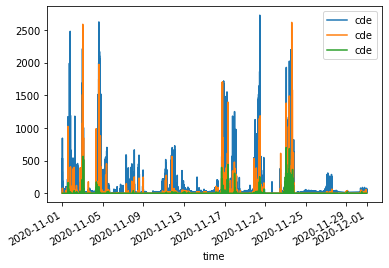

In [30]:
frame['cde'].plot(kind = 'line')

In [34]:
layer_1 = frame.iloc[:,0:44]
layer_2 = frame.iloc[:,44:88]
layer_3 = frame.iloc[:,88:132]

In [35]:
pwd

'/Users/varungandhi/Downloads/python_notebooks'

In [36]:
layer_1.to_csv('ceilometer_layer1_n.csv', header= True, index= True)
layer_2.to_csv('ceilometer_layer2_n.csv', header= True, index= True)
layer_3.to_csv('ceilometer_layer3_n.csv', header= True, index= True)


In [38]:
final

,time,range,range_hr,layer,latitude,longitude,azimuth,zenith,altitude,wavelength,...,bcc,sci,vor,voe,mxd,cbh,cbe,cdp,cde,cho
0,2020-11-13 00:00:54,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,1,195,168,245,-1,-1,-1,-1,0
1,2020-11-13 00:00:54,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,1,195,168,245,-1,-1,-1,-1,0
2,2020-11-13 00:01:54,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,1,195,168,385,-1,-1,-1,-1,0
3,2020-11-13 00:01:54,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,1,195,168,385,-1,-1,-1,-1,0
4,2020-11-13 00:02:54,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,1,255,200,405,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,2020-11-15 23:57:59,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,0,390,253,425,-1,-1,-1,-1,0
7739,2020-11-15 23:58:59,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,0,385,251,415,-1,-1,-1,-1,0
7740,2020-11-15 23:58:59,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,0,385,251,415,-1,-1,-1,-1,0
7741,2020-11-15 23:59:59,14.985,0.001,1,47.428883,19.182392,0.0,0.0,139.0,1064.0,...,8,0,375,248,405,-1,-1,-1,-1,0
